In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
StHomoCampaigns_4StHomoResources = pd.read_csv('StHomoCampaigns_4StHomoResources.csv')

In [3]:
StHomoCampaigns_4StHomoResources = StHomoCampaigns_4StHomoResources.drop('plan',axis=1)
StHomoCampaigns_4StHomoResources = StHomoCampaigns_4StHomoResources.groupby(by=['planner','size'])
StHomoCampaigns_4StHomoResources_makespan_means = StHomoCampaigns_4StHomoResources.mean()
StHomoCampaigns_4StHomoResources_makespan_stds = StHomoCampaigns_4StHomoResources.std()

In [4]:
pprint(StHomoCampaigns_4StHomoResources_makespan_means/3600)

                 makespan
planner size             
HEFT    4       20.833333
        8       41.666667
        16      83.333333
        32     166.666667
        64     333.333333
        128    666.666667
        256   1333.333333
        512   2666.666667
        1024  5333.333333
RANDOM  4       44.120833
        8       73.712500
        16     127.791667
        32     228.829167
        64     420.279167
        128    789.297917
        256   1506.783333
        512   2910.193750
        1024  5676.029167


In [5]:
pprint(StHomoCampaigns_4StHomoResources_makespan_stds/3600)

                makespan
planner size            
HEFT    4       0.000000
        8       0.000000
        16      0.000000
        32      0.000000
        64      0.000000
        128     0.000000
        256     0.000000
        512     0.000000
        1024    0.000000
RANDOM  4      11.967044
        8      16.493941
        16     22.794787
        32     31.535960
        64     43.191687
        128    60.327559
        256    83.874300
        512   117.705858
        1024  165.161070


In [6]:
workflows_sizes = [4,8,16,32,64,128,256,512,1024]
min_vals = []
max_vals = []

for size in workflows_sizes:
    min_vals.append(75000 * size / 4)
    max_vals.append(75000 * size)
    
print(min_vals, max_vals)

[75000.0, 150000.0, 300000.0, 600000.0, 1200000.0, 2400000.0, 4800000.0, 9600000.0, 19200000.0] [300000, 600000, 1200000, 2400000, 4800000, 9600000, 19200000, 38400000, 76800000]


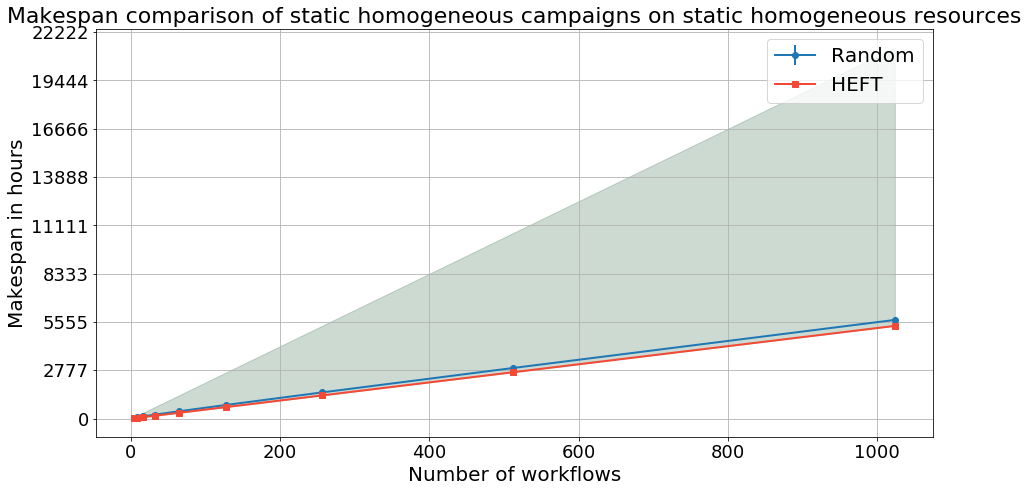

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index,StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').values,StHomoCampaigns_4StHomoResources_makespan_stds.xs('RANDOM').values,marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT').index,StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT', color=reds(150),linewidth=2)
_ = axis.fill_between(workflows_sizes,min_vals, max_vals, color=greens(250), alpha=0.2)
_ = axis.set_ylabel('Makespan in hours',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/3600).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')

In [8]:
StHeteroCampaigns_4StHomoResources = pd.read_csv('StHeteroCampaigns_4StHomoResources.csv')
locs = [0,20000,40000,60000,80000,100000,120000,140000,160000]
operations = []
for loc in locs:
    wsize = StHeteroCampaigns_4StHomoResources.loc[loc]['size']
    plan = eval(StHeteroCampaigns_4StHomoResources.loc[loc]['plan'])
    num_oper = []
    for i in range(wsize):
        num_oper.append(plan[i][0]['num_oper'])
    operations.append(num_oper)
min_vals = []
max_vals = []

for opers in operations:
    max_vals.append(sum(opers))
    equid_dist1 = []
    equid_dist2 = []
    equid_dist3 = []
    equid_dist4 = []
    opers.sort()
    for i in range(0,len(opers),4):
        equid_dist1.append(opers[i + 0])
        equid_dist2.append(opers[i + 1])
        equid_dist3.append(opers[i + 2])
        equid_dist4.append(opers[i + 3])
    min_vals.append(max(sum(equid_dist1),sum(equid_dist2),sum(equid_dist3),sum(equid_dist4)))
        
StHeteroCampaigns_4StHomoResources = StHeteroCampaigns_4StHomoResources.drop('plan',axis=1)
StHeteroCampaigns_4StHomoResources = StHeteroCampaigns_4StHomoResources.groupby(by=['planner','size'])
StHeteroCampaigns_4StHomoResources_makespan_means = StHeteroCampaigns_4StHomoResources.mean()
StHeteroCampaigns_4StHomoResources_makespan_stds = StHeteroCampaigns_4StHomoResources.std()
print(min_vals, max_vals)

[87296.32259795161, 161053.12492733373, 314091.0208632128, 612383.0912617781, 1212689.553639046, 2404604.961413022, 4858173.283076352, 9635463.986348093, 19264716.08709396] [318551.70572420163, 608170.6945585017, 1224968.2044719323, 2398773.647564848, 4816296.187070636, 9552760.58215453, 19386499.289296653, 38484328.82601819, 77007603.7353395]


In [9]:
pprint(StHeteroCampaigns_4StHomoResources_makespan_means/3600)

                 makespan
planner size             
HEFT    4       24.248978
        8       42.618614
        16      85.230011
        32     166.889013
        64     334.749270
        128    663.686269
        256   1346.359151
        512   2673.404121
        1024  5347.973214
RANDOM  4       47.637521
        8       75.303781
        16     131.207129
        32     229.004688
        64     423.298991
        128    785.895596
        256   1522.370324
        512   2919.498934
        1024  5693.002092


In [10]:
pprint(StHeteroCampaigns_4StHomoResources_makespan_stds/3600)

                makespan
planner size            
HEFT    4       0.000000
        8       0.000000
        16      0.000000
        32      0.000000
        64      0.000000
        128     0.000000
        256     0.000000
        512     0.000000
        1024    0.000000
RANDOM  4      12.393993
        8      16.373528
        16     22.886394
        32     31.070500
        64     43.995964
        128    59.894195
        256    85.459510
        512   118.847901
        1024  166.412358


In [11]:
workflows_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

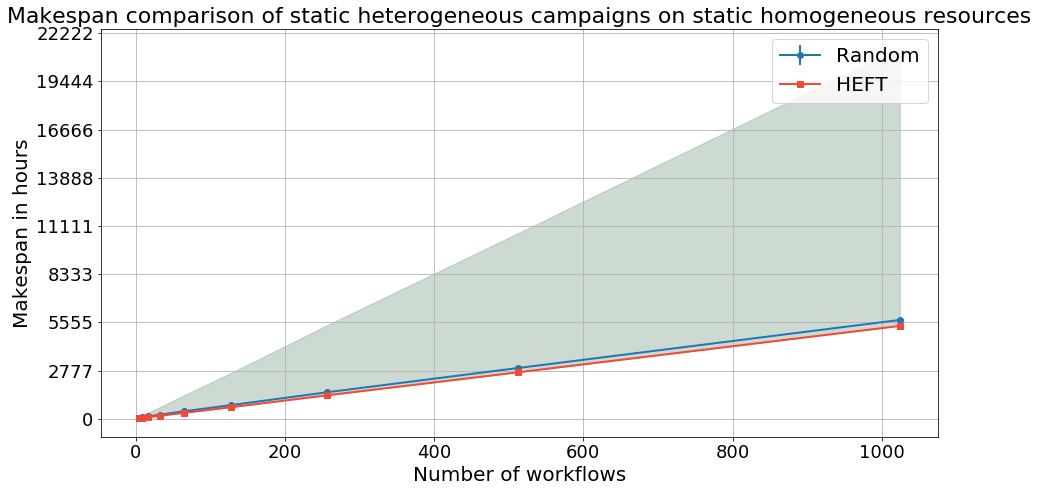

In [12]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4StHomoResources_makespan_stds.xs('RANDOM').values,marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT', color=reds(150),linewidth=2)
_ = axis.fill_between(workflows_sizes,min_vals, max_vals, color=greens(250), alpha=0.2)
_ = axis.set_ylabel('Makespan in hours',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/3600).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroCampaigns_4StHomoResources.png',bbox_inches='tight')

In [13]:
StHeteroCampaigns_4St025HeteroResources = pd.read_csv('StHeteroCampaigns_4St025HeteroResources.csv')
StHeteroCampaigns_4St050HeteroResources = pd.read_csv('StHeteroCampaigns_4St050HeteroResources.csv')
StHeteroCampaigns_4St075HeteroResources = pd.read_csv('StHeteroCampaigns_4St075HeteroResources.csv')
StHeteroCampaigns_4St100HeteroResources = pd.read_csv('StHeteroCampaigns_4St100HeteroResources.csv')

In [14]:
StHeteroCampaigns_4St025HeteroResources                = StHeteroCampaigns_4St025HeteroResources.drop('plan',axis=1)
StHeteroCampaigns_4St025HeteroResources                = StHeteroCampaigns_4St025HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St025HeteroResources_makespan_means = StHeteroCampaigns_4St025HeteroResources.mean()
StHeteroCampaigns_4St025HeteroResources_stds           = StHeteroCampaigns_4St025HeteroResources.std()

StHeteroCampaigns_4St050HeteroResources                = StHeteroCampaigns_4St050HeteroResources.drop('plan',axis=1)
StHeteroCampaigns_4St050HeteroResources                = StHeteroCampaigns_4St050HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St050HeteroResources_makespan_means = StHeteroCampaigns_4St050HeteroResources.mean()
StHeteroCampaigns_4St050HeteroResources_stds           = StHeteroCampaigns_4St050HeteroResources.std()

StHeteroCampaigns_4St075HeteroResources                = StHeteroCampaigns_4St075HeteroResources.drop('plan',axis=1)
StHeteroCampaigns_4St075HeteroResources                = StHeteroCampaigns_4St075HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St075HeteroResources_makespan_means = StHeteroCampaigns_4St075HeteroResources.mean()
StHeteroCampaigns_4St075HeteroResources_stds           = StHeteroCampaigns_4St075HeteroResources.std()

StHeteroCampaigns_4St100HeteroResources                = StHeteroCampaigns_4St100HeteroResources.drop('plan',axis=1)
StHeteroCampaigns_4St100HeteroResources                = StHeteroCampaigns_4St100HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St100HeteroResources_makespan_means = StHeteroCampaigns_4St100HeteroResources.mean()
StHeteroCampaigns_4St100HeteroResources_stds           = StHeteroCampaigns_4St100HeteroResources.std()

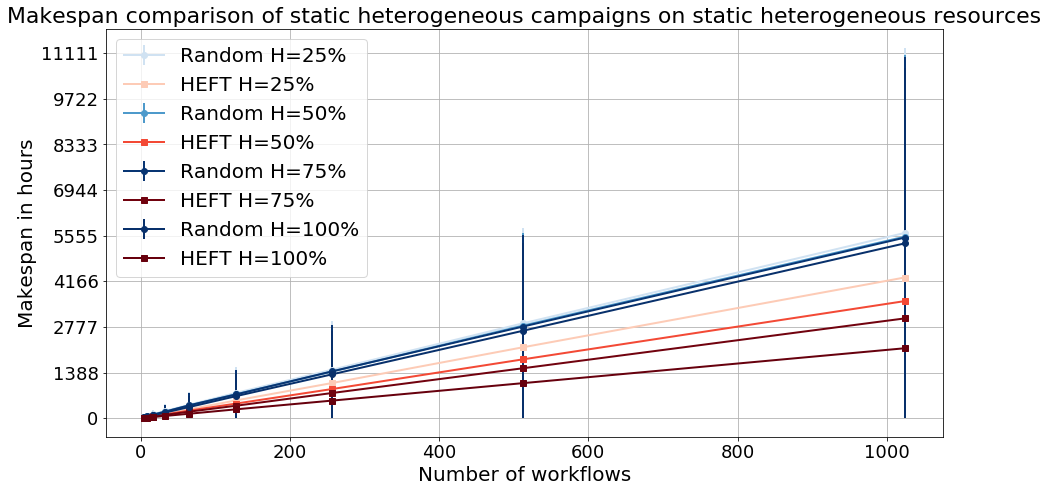

In [15]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').values,marker='o',label='Random H=25%',linewidth=2, color=blues(50))
_ = axis.errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT H=25%', color=reds(50),linewidth=2)

_ = axis.errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').values,marker='o',label='Random H=50%',linewidth=2, color=blues(150))
_ = axis.errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT H=50%', color=reds(150),linewidth=2)

_ = axis.errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').values,marker='o',label='Random H=75%',linewidth=2, color=blues(250))
_ = axis.errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT H=75%', color=reds(250),linewidth=2)

_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').values,marker='o',label='Random H=100%',linewidth=2, color=blues(350))
_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT H=100%', color=reds(350),linewidth=2)


_ = axis.set_ylabel('Makespan in hours',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/3600).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns on static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroCampaigns_4StHeteroResources.png',bbox_inches='tight')

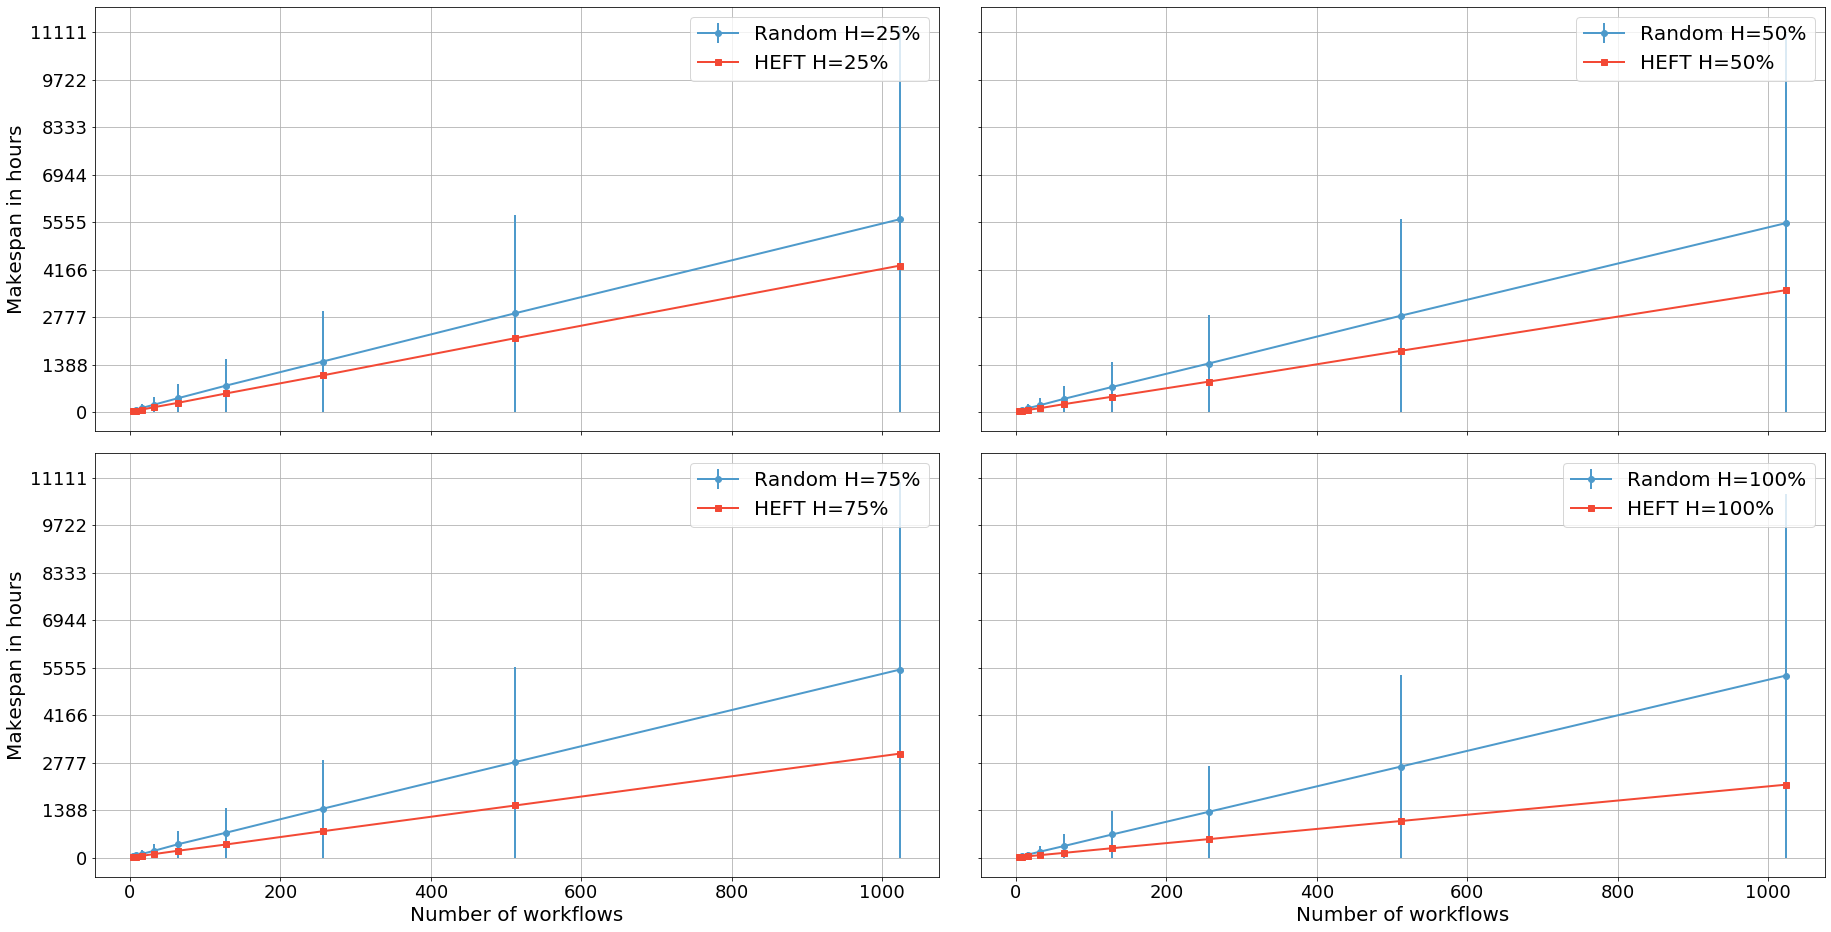

In [16]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(31,16), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').values,marker='o',label='Random H=25%',linewidth=2, color=blues(150))
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT H=25%', color=reds(150),linewidth=2)

_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').values,marker='o',label='Random H=50%',linewidth=2, color=blues(150))
_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT H=50%', color=reds(150),linewidth=2)

_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').values,marker='o',label='Random H=75%',linewidth=2, color=blues(150))
_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT H=75%', color=reds(150),linewidth=2)

_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').values,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').values,marker='o',label='Random H=100%',linewidth=2, color=blues(150))
_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT').values,marker='s',label='HEFT H=100%', color=reds(150),linewidth=2)


_ = axis[0,0].set_ylabel('Makespan in hours',fontsize=20)
_ = axis[1,0].set_ylabel('Makespan in hours',fontsize=20)
_ = axis[1,0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,0].set_xticklabels(axis[1,0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1,1].set_xticklabels(axis[1,1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0,0].set_yticklabels((axis[0,0].get_yticks()/3600).astype('int').tolist(),fontsize=18)
_ = axis[1,0].set_yticklabels((axis[1,0].get_yticks()/3600).astype('int').tolist(),fontsize=18)
_ = axis[0,0].grid('on')
_ = axis[0,1].grid('on')
_ = axis[1,0].grid('on')
_ = axis[1,1].grid('on')
_ = axis[0,0].legend(fontsize=20)
_ = axis[0,1].legend(fontsize=20)
_ = axis[1,0].legend(fontsize=20)
_ = axis[1,1].legend(fontsize=20)
#_ = axis.set_title('Makespan comparison of static heterogeneous campaigns on static homogeneous resources', fontsize=22)



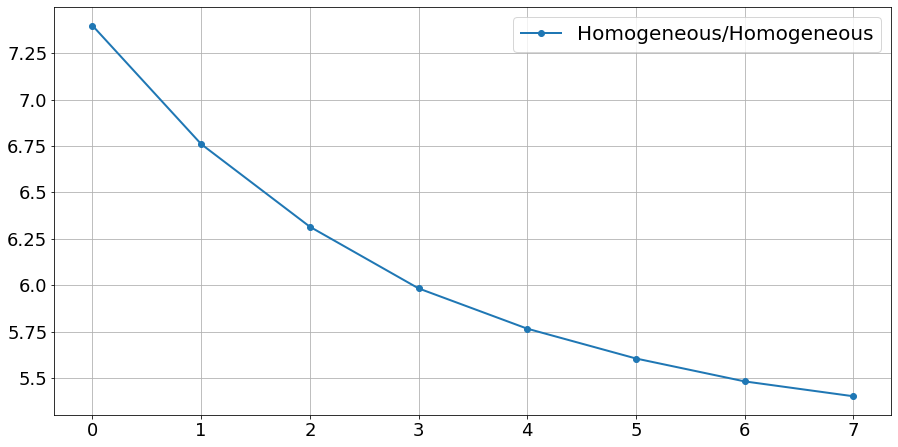

In [17]:
gradient1, gradient2, gradient3, gradient4, gradient5, gradient6 = list(), list(), list(), list(), list(), list()
for i in range(1,9):
    gradient1.append(((StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').values[i] - StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').values[i-1])/(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index[i] - StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index[i-1])/3600))
    gradient2.append(((StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').values[i] - StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').values[i-1])/(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index[i] - StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index[i-1])/3600))
    gradient3.append(((StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').values[i] - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').values[i-1])/(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index[i] - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index[i-1])/3600))
    gradient4.append(((StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').values[i] - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').values[i-1])/(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index[i] - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index[i-1])/3600))
    gradient5.append(((StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').values[i] - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').values[i-1])/(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index[i] - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index[i-1])/3600))
    gradient6.append(((StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').values[i] - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').values[i-1])/(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index[i] - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index[i-1])/3600))


fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(gradient1, marker='o',label='Homogeneous/Homogeneous',linewidth=2)
#_ = axis.plot(gradient2, marker='s',label='Heterogeneous/Homogeneous', color=reds(50),linewidth=2)
#_ = axis.plot(gradient3, marker='s',label='Heterogeneous/Homogeneous', color=reds(150),linewidth=2)
#_ = axis.plot(gradient4, marker='s',label='Heterogeneous/Homogeneous', color=reds(250),linewidth=2)
#_ = axis.plot(gradient5, marker='s',label='Heterogeneous/Homogeneous', color=reds(350),linewidth=2)
#_ = axis.plot(gradient6, marker='s',label='Heterogeneous/Homogeneous', color=reds(450),linewidth=2)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()).astype('float').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)